In [1]:
import math
import random
import re
import shutil
import os
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

import scipy.stats as st

# cwd
os.chdir(r'/Users/guichengtong/Desktop/stat-flow/ns-3.40')
os.system("mkdir data")
os.system("./ns3 clean")
os.system("./ns3 configure")
os.system("./ns3 build")
print(os.getcwd())

mkdir: data: File exists


Finished executing the following commands:
rm -R build
rm -R cmake-cache
rm -R .lock-ns3_darwin_build
-- The CXX compiler identification is AppleClang 15.0.0.15000100
-- The C compiler identification is AppleClang 15.0.0.15000100
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /Library/Developer/CommandLineTools/usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Using default output directory /Users/guichengtong/Desktop/stat-flow/ns-3.40/build
-- Proceeding without cmake-format
-- Performing Test MISSING_OSTREAM_NULLPTR_OPERATOR
-- Performing Test MISSING_OSTREAM_NULLPTR_OPERATOR - Failed
-- Performing Test FILESYSTEM_LIBRARY_IS_LINKED
-- Perfor

In [2]:
# [INITALISE]
REAL_COUNTS = {}

# configs
Lambda = 5000
seconds = 100
delta = 0.001


In [3]:
# [MUST RUN] helper functions for running and parsing

class EventType(Enum):
    ENQUEUE = 1
    SEND_OR_DEQUEUE = 2
    RECEIVE = 3

def run_simple(l=1000):
    os.system("rm -rf traces")
    os.system("mkdir traces")
    os.system("./ns3 run scratch/two-flow.cc -- -lambda1={} -lambda2={} > traces/two-flow-logs.txt 2>&1".format(l, l))
    print("./ns3 run scratch/two-flow.cc -- -lambda1={} -lambda2={} > traces/two-flow-logs.txt 2>&1".format(l, l))


def run_random(l, save_data = True):
    seed = random.randrange(1, 2**31)
    os.system("rm -rf traces")
    os.system("mkdir traces")
    os.system("./ns3 run scratch/two-flow.cc -- -lambda1={} -lambda2={} -seed={} > traces/two-flow-logs.txt 2>&1".format(l, l, seed))
    print("./ns3 run scratch/two-flow.cc -- -lambda1={} -lambda2={} -seed={} > traces/two-flow-logs.txt 2>&1".format(l, l, seed))
    # save data
    if save_data:
        cwd = os.getcwd()
        os.system("rm -rf {}/data/l_{}-s_{}/traces".format(cwd, l, seconds))
        shutil.copytree("{}/traces".format(cwd), "{}/data/l_{}-s_{}/traces".format(cwd, l, seconds))

def get_span(matcher, txt):
    return txt[matcher.span()[0]:matcher.span()[1]]

def parse_info(line, link):
    event = None
    if line[0] == '+':
        event = EventType.ENQUEUE
    elif line[0] == '-':
        event = EventType.SEND_OR_DEQUEUE
    elif line[0] == 'r':
        event = EventType.RECEIVE


    time = float(line[1:].split()[0])
    length_matcher = re.search("(size=\d*)", line)
    if length_matcher is None:
        length = 0
    else:
        length = int(line[length_matcher.span()[0]+5:length_matcher.span()[1]])
    src_dest_matcher = re.search("\d*\.\d*\.\d*\.\d*\s[\>\<]\s\d*\.\d*\.\d*\.\d", line)
    src_dest_str = get_span(src_dest_matcher, line)
    id_matcher = re.search("id \d*", line)
    id_no = int(line[id_matcher.span()[0]+3:id_matcher.span()[1]])
    
    return {"link": link,
            "event": event, 
            "time": time, 
            "len":length,
            "src_dest":src_dest_str,
            "id":id_no}

def parse_link(host_node, int1, int2, events, Lambda, use_saved_data=True):
    # returns the link string
    filename = "traces/-{}-Int{}->{}.tr".format(host_node, int1, int2)

    if use_saved_data:
        filename = "data/l_{}-s_{}/".format(Lambda, seconds) + filename
        # print("using saved data from", filename)

    f = open(filename, "r")
    link = "{}->{}".format(str(int1), str(int2))
    while True:
        line = f.readline()
        if len(line) == 0:
            break
        info = parse_info(line, link)
        events.append(info)

    return link

def event_str(event):
    if event == EventType.ENQUEUE:
        return "Enqueue"
    elif event == EventType.SEND_OR_DEQUEUE:
        return "SEND"
    elif event == EventType.RECEIVE:
        return "RCV"
    else:
        return "ERROR"



In [20]:
# remake all data in range of Lambda 
for i in range(1, 11):
    Lambda = i * 1000
    run_random(Lambda)


./ns3 run scratch/two-flow.cc -- -lambda1=1000 -lambda2=1000 -seed=1029647632 > traces/two-flow-logs.txt 2>&1
./ns3 run scratch/two-flow.cc -- -lambda1=2000 -lambda2=2000 -seed=339265723 > traces/two-flow-logs.txt 2>&1
./ns3 run scratch/two-flow.cc -- -lambda1=3000 -lambda2=3000 -seed=751646069 > traces/two-flow-logs.txt 2>&1
./ns3 run scratch/two-flow.cc -- -lambda1=4000 -lambda2=4000 -seed=708214663 > traces/two-flow-logs.txt 2>&1
./ns3 run scratch/two-flow.cc -- -lambda1=5000 -lambda2=5000 -seed=1082262249 > traces/two-flow-logs.txt 2>&1
./ns3 run scratch/two-flow.cc -- -lambda1=6000 -lambda2=6000 -seed=1429905629 > traces/two-flow-logs.txt 2>&1
./ns3 run scratch/two-flow.cc -- -lambda1=7000 -lambda2=7000 -seed=486206633 > traces/two-flow-logs.txt 2>&1
./ns3 run scratch/two-flow.cc -- -lambda1=8000 -lambda2=8000 -seed=482651129 > traces/two-flow-logs.txt 2>&1
./ns3 run scratch/two-flow.cc -- -lambda1=9000 -lambda2=9000 -seed=321618313 > traces/two-flow-logs.txt 2>&1
./ns3 run scratc

0.205158 100.005


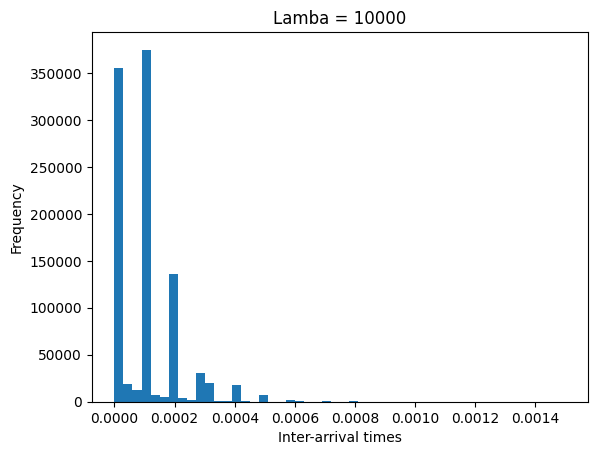

In [21]:
# parse link on Se1, plot inter-arrival times between packets
def plot_inter_arrival_times(Lambda):
    # only use saved data
    events = []
    parse_link("Router1", "R1", "Se1", events, Lambda)

    s_e =  sorted(filter(lambda x: x["event"] == EventType.SEND_OR_DEQUEUE, events), key=lambda x: x["time"])

    first_p_time =  s_e[0]["time"]
    prev_time = first_p_time
    last_p_time = s_e[-1]["time"]

    print(first_p_time, last_p_time)

    times = []

    for i in range(1, len(s_e)):
        times.append(s_e[i]["time"] - prev_time)
        prev_time = s_e[i]["time"]
    
    
    plt.figure()
    plt.title("Lamba = {}".format(Lambda))
    plt.xlabel("Inter-arrival times")
    plt.ylabel("Frequency")

    plt.hist(times, bins=50)

    plt.show()

plot_inter_arrival_times(10000)


0.205158 100.005
total of 998479 packets


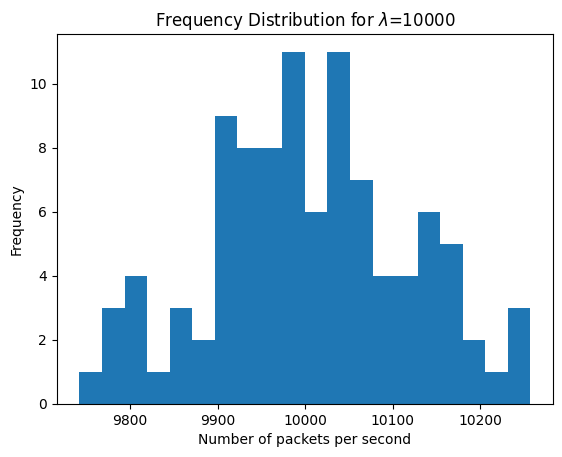

In [22]:
# proves that our process is poisson - graph frequency of packets per second
def plot_distribution(l):
    events = []
    parse_link("Router1", "R1", "Se1", events, l)

    s_e =  sorted(filter(lambda x: x["event"] == EventType.SEND_OR_DEQUEUE, events), key=lambda x: x["time"])

    first_p_time =  s_e[0]["time"]
    last_p_time = s_e[-1]["time"]

    print(first_p_time, last_p_time)

    # number of bins = number of seconds
    num_bins = math.ceil(last_p_time - first_p_time) 
    bins = range(num_bins)
    counts = [0 for _ in bins]

    # need to adjust times to be time - first_p_time
    for e in s_e:
        # count number of packets in each second
        counts[math.floor(e["time"] - first_p_time)] += 1

    print("total of {} packets".format(sum(counts)))
    
    plt.figure()
    plt.title("Frequency Distribution for $\lambda$={}".format(l))
    plt.xlabel("Number of packets per second")
    plt.ylabel("Frequency")
    # ignore the last second
    plt.hist(counts[:-1], bins=20)

    plt.show()

plot_distribution(10000)


In [4]:
# [MUST RUN] helper functions to count synchronised packets

class DefaultStrategy:
    # memory of 1, only sync if packets are within delta
    def __init__(self, sorted_events, link1, link2):
        self.events = sorted_events
        self.link1 = link1
        self.link2 = link2

    def count_sync(self, delta):
        sync_count = 0
        prev_e = None
        for e in self.events:
            if prev_e is None:
                prev_e = e
            
            else:
                # sync condition - e is of different stream within prev_e[time] + delta
                if e["link"] == prev_e["link"] and e["time"] < prev_e["time"] + delta:
                    sync_count += 1
                    prev_e = None
                # otherwise update prev event
                else:
                    prev_e = e
        
        return sync_count
    
def count_sync(Lambda, delta, seconds, strategy=DefaultStrategy, re_init_data =False):
    # return number of packets that can be synced per second
    # re_init_data - option to remake data in dictionary
    global REAL_COUNTS
    save_key = "{}-{}".format(Lambda, delta)

    # if we do not want to remake data and we do have data, we just return 
    if (not re_init_data) and save_key in REAL_COUNTS.keys():
        return REAL_COUNTS[save_key] 
    
    print("MAKING DATA FOR {}".format(save_key))

    s1_events = []
    l1 = parse_link("Router1", "R1", "Se1", s1_events, Lambda)
    s2_events = []
    l2 = parse_link("Router1", "R1", "Se2", s2_events, Lambda)

    events =  sorted(filter(lambda x: x["event"] == EventType.SEND_OR_DEQUEUE, s1_events + s2_events), key=lambda x: x["time"])

    counter = strategy(events, l1, l2).count_sync(delta)

    REAL_COUNTS[save_key] = counter / seconds

    return counter / seconds


In [5]:
# [MUST RUN] helper functions for plotting 

def get_expected(l_1, l_2, Delta):
    exp_time = (l_1 + l_2) / (l_1 * l_2)

    if Delta <= exp_time/2:
        return_val = math.floor((1 / Delta) * (1- math.e ** (-Delta * l_1)) * (1 - math.e ** (-Delta * l_2))) 
    else:
        return_val = math.floor(1 / exp_time)

    return return_val

def get_confidence(Lambda, delta, seconds, E=0.001, l1 = True):
    # returns total packets on both paths
    n = count_sync(Lambda, delta, seconds) * seconds 
    p_hat = 0.1

    z = math.sqrt(((E**2) * n) / (p_hat * (1 - p_hat)))

    # since we are two-tailed, we want to remove the -z score
    confidence = st.norm.cdf(z) - st.norm.cdf(-z)

    return confidence



MAKING DATA FOR 1000-0.0001
MAKING DATA FOR 1000-0.0002
MAKING DATA FOR 1000-0.0003
MAKING DATA FOR 1000-0.0004
MAKING DATA FOR 1000-0.0005
MAKING DATA FOR 1000-0.0006
MAKING DATA FOR 1000-0.0007
MAKING DATA FOR 1000-0.0008
MAKING DATA FOR 1000-0.0009
MAKING DATA FOR 1000-0.001
MAKING DATA FOR 2000-0.0001
MAKING DATA FOR 2000-0.0002
MAKING DATA FOR 2000-0.0003
MAKING DATA FOR 2000-0.0004
MAKING DATA FOR 2000-0.0005
MAKING DATA FOR 2000-0.0006
MAKING DATA FOR 2000-0.0007
MAKING DATA FOR 2000-0.0008
MAKING DATA FOR 2000-0.0009
MAKING DATA FOR 2000-0.001
MAKING DATA FOR 3000-0.0001
MAKING DATA FOR 3000-0.0002
MAKING DATA FOR 3000-0.0003
MAKING DATA FOR 3000-0.0004
MAKING DATA FOR 3000-0.0005
MAKING DATA FOR 3000-0.0006
MAKING DATA FOR 3000-0.0007
MAKING DATA FOR 3000-0.0008
MAKING DATA FOR 3000-0.0009
MAKING DATA FOR 3000-0.001
MAKING DATA FOR 4000-0.0001
MAKING DATA FOR 4000-0.0002
MAKING DATA FOR 4000-0.0003
MAKING DATA FOR 4000-0.0004
MAKING DATA FOR 4000-0.0005
MAKING DATA FOR 4000-0.

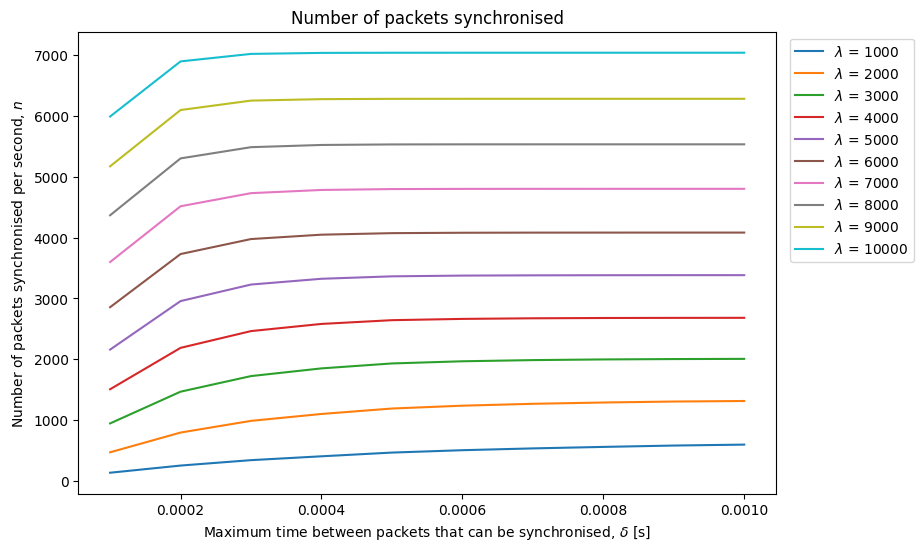

In [15]:
# plot number of packets synced against delta

def plot_delta_dist(Lambda, seconds, remake_data=False):
    # plot the number of packets synced for different values of delta
    deltas = [i/10000 for i in range(1, 11)]
    counts = [count_sync(Lambda, d, seconds, re_init_data=remake_data) for d in deltas]

    plt.plot(deltas, counts, label="$\lambda$ = {}".format(Lambda))

fig = plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.title("Number of packets synchronised")

for i in range(1, 11):
    plot_delta_dist(i * 1000, seconds)

plt.xlabel("Maximum time between packets that can be synchronised, $\\delta$ [s]")
plt.ylabel("Number of packets synchronised per second, $n$")
ax.legend(bbox_to_anchor=(1.01, 1))
plt.show()


[0.0001  0.00011 0.00012 0.00013 0.00014 0.00015 0.00016 0.00017 0.00018
 0.00019 0.0002  0.00021 0.00022 0.00023 0.00024 0.00025 0.00026 0.00027
 0.00028 0.00029 0.0003  0.00031 0.00032 0.00033 0.00034 0.00035 0.00036
 0.00037 0.00038 0.00039 0.0004  0.00041 0.00042 0.00043 0.00044 0.00045
 0.00046 0.00047 0.00048 0.00049 0.0005  0.00051 0.00052 0.00053 0.00054
 0.00055 0.00056 0.00057 0.00058 0.00059 0.0006  0.00061 0.00062 0.00063
 0.00064 0.00065 0.00066 0.00067 0.00068 0.00069 0.0007  0.00071 0.00072
 0.00073 0.00074 0.00075 0.00076 0.00077 0.00078 0.00079 0.0008  0.00081
 0.00082 0.00083 0.00084 0.00085 0.00086 0.00087 0.00088 0.00089 0.0009
 0.00091 0.00092 0.00093 0.00094 0.00095 0.00096 0.00097 0.00098 0.00099
 0.001   0.00101 0.00102 0.00103 0.00104 0.00105 0.00106 0.00107 0.00108
 0.00109]
[0.0001  0.00011 0.00012 0.00013 0.00014 0.00015 0.00016 0.00017 0.00018
 0.00019 0.0002  0.00021 0.00022 0.00023 0.00024 0.00025 0.00026 0.00027
 0.00028 0.00029 0.0003  0.00031 0.00032 0

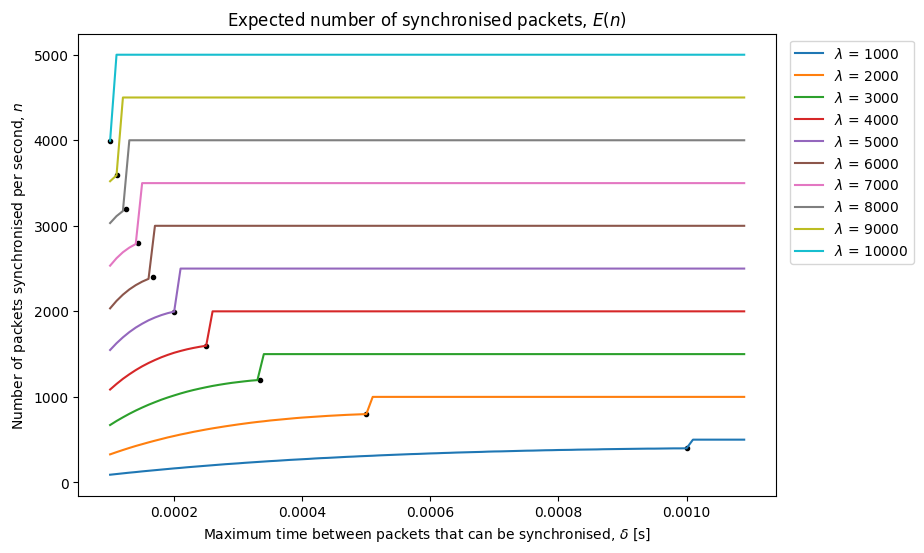

In [14]:
# plot expected number of packets against delta
colors = ['b', 'orange', 'green', 'red', 'purple', 'brown', 'magenta', 'gray', 'yellow', 'cyan']

def plot_expected_sync(Lambda, c):
    # plot the number of packets synced for different values of delta
    deltas = np.arange(0.0001, 0.0011, 0.00001)
    print(deltas)
    expecteds = [get_expected(Lambda, Lambda,  d) for d in deltas]

    plt.plot(deltas, expecteds, label="$\lambda$ = {}".format(Lambda))


    # to show the point of delta = 1/Lambda
    plt.scatter([1/Lambda], [get_expected(Lambda, Lambda, 1/Lambda)], c='black', marker='.')

fig = plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.title("Expected number of synchronised packets, $E(n)$")
# plt.ylim(top=7400, bottom=-200)

for i in range(1, 11):
    plot_expected_sync(i * 1000, colors[i-1])

plt.xlabel("Maximum time between packets that can be synchronised, $\\delta$ [s]")
plt.ylabel("Number of packets synchronised per second, $n$")
plt.legend()
ax.legend(bbox_to_anchor=(1.01, 1))
plt.show()


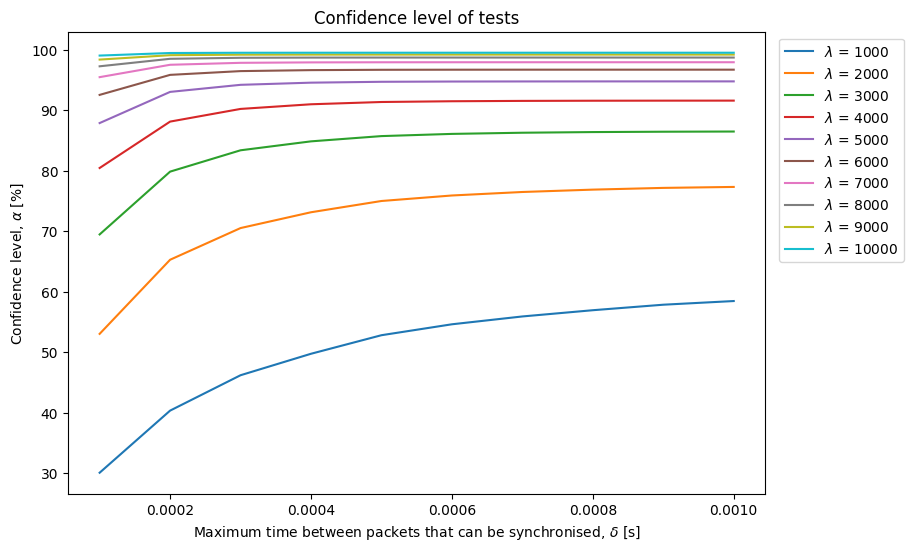

In [78]:
# plot confidence against delta

def plot_confidence_against_delta(Lambda, seconds):
    deltas = [i/10000 for i in range(1, 11)]
    confidence = [get_confidence(Lambda, d, seconds) * 100 for d in deltas]

    plt.plot(deltas, confidence, label="$\lambda$ = {}".format(Lambda))


fig = plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.title("Confidence level of tests")
for i in range(1, 11):
    plot_confidence_against_delta(i * 1000, seconds)
plt.xlabel("Maximum time between packets that can be synchronised, $\\delta$ [s]")

plt.ylabel("Confidence level, $\\alpha$ [%]")
plt.legend()
ax.legend(bbox_to_anchor=(1.01, 1))
plt.show()
